# **Probability Theory**

# Exercise 1: Introduction to Probability Theory in AI

In [89]:
def joint_probability(p_A, p_B):
  return p_A * p_B

def marginal_probability(p_A, p_B):
  return p_A + p_B - joint_probability(p_A, p_B)

def conditional_probability(p_B_given_A, p_A, p_B):
  return (p_B_given_A * p_A) / p_B

p_A = 0.3
p_B = 0.4
p_B_given_A = 0.8

print(f"Joint Probability: {joint_probability(p_A, p_B)}")
print(f"Marginal Probability: {marginal_probability(p_A, p_B)}")
print(f"Conditional Probability: {conditional_probability(p_B_given_A, p_A, p_B)}")

Joint Probability: 0.12
Marginal Probability: 0.58
Conditional Probability: 0.6


# Assessment Task 1: Basic Probability Calculations

In [90]:
def joint_probability(p_A, p_B):
    if not (0 <= p_A <= 1 and 0 <= p_B <= 1):
        return "Invalid input: Probabilities must be between 0 and 1."
    return p_A * p_B

In [91]:
def marginal_probability(p_A, p_B):
    jp = joint_probability(p_A, p_B)
    if isinstance(jp, str):
        return jp
    return p_A + p_B - jp

In [92]:
def conditional_probability(p_A_and_B, p_A):
    if p_A == 0:
        return "Conditional probability is undefined (P(A) cannot be zero)."
    return p_A_and_B / p_A

In [93]:
p_A = 0.3
p_B = 0.4

p_B_given_A = 0.8

joint_prob = joint_probability(p_A, p_B)
print(f"Joint Probability: {joint_prob}")

marginal_prob = marginal_probability(p_A, p_B)
print(f"Marginal Probability: {marginal_prob}")

if isinstance(joint_prob, float):
    cond_prob = conditional_probability(joint_prob, p_A)
    print(f"Conditional Probability P(B|A): {cond_prob}")
else:
    print("Cannot compute conditional probability due to invalid joint probability.")

if joint_prob == p_A * p_B:
    print("Correct! The joint probability was calculated using P(A and B) = P(A) * P(B).")
else:
    print("Incorrect. Remember, for independent events, P(A and B) = P(A) * P(B).")

Joint Probability: 0.12
Marginal Probability: 0.58
Conditional Probability P(B|A): 0.4
Correct! The joint probability was calculated using P(A and B) = P(A) * P(B).


# **Bayesian Networks**

# Exercise 2: Bayesian Inference

In [94]:
def bayesian_inference(prior, likelihood_positive_given_disease, likelihood_positive):
  posterior = (likelihood_positive_given_disease * prior) / likelihood_positive
  return posterior

prior_disease = 0.01
likelihood_positive_given_disease = 0.9
likelihood_positive = 0.05

posterior_disease = bayesian_inference(prior_disease, likelihood_positive_given_disease, likelihood_positive)
print(f"Posterior probability of disease given positive test: {posterior_disease}")

Posterior probability of disease given positive test: 0.18000000000000002


# Assessment Task 2: Applying Probability Theory in AI for Diagnosis

In [95]:
def bayesian_inference(p_positive_given_disease, p_disease, p_positive_given_no_disease):
    prior_disease = p_disease

    likelihood_positive_given_disease = p_positive_given_disease

    prior_no_disease = 1 - prior_disease

    likelihood_positive_given_no_disease = p_positive_given_no_disease

    p_positive_test = (likelihood_positive_given_disease * prior_disease) + \
                      (likelihood_positive_given_no_disease * prior_no_disease)

    p_disease_given_positive = (likelihood_positive_given_disease * prior_disease) / p_positive_test

    return p_disease_given_positive

p_positive_given_disease = 0.90
p_disease = 0.01
p_positive_given_no_disease = 0.05

p_disease_given_positive = bayesian_inference(p_positive_given_disease, p_disease, p_positive_given_no_disease)

print(f"Probability of having the disease given a positive test result: {p_disease_given_positive:.4f}")

if p_disease_given_positive > 0.5:
    print("Based on the Bayesian calculation, it is likely the person has the disease.")
else:
    print("Based on the Bayesian calculation, it is unlikely the person has the disease.")


Probability of having the disease given a positive test result: 0.1538
Based on the Bayesian calculation, it is unlikely the person has the disease.


# Exercise 3: Decision-Making Under Uncertainty

In [96]:
import numpy as np

def simulate_decision(num_simulations, p_success, reward_success, reward_failure):
  outcomes = []
  for _ in range(num_simulations):
    if np.random.rand() < p_success:
      outcomes.append(reward_success)
    else:
      outcomes.append(reward_failure)
  return np.mean(outcomes)

p_success = 0.7
reward_success = 1000
reward_failure = -500

average_outcome = simulate_decision(1000, p_success, reward_success, reward_failure)
print(f"Expected value of decision: {average_outcome}")

Expected value of decision: 553.0


# Assessment Task 3: Decision-Making Under Uncertainty

Average return after 1000 iterations: $538.00


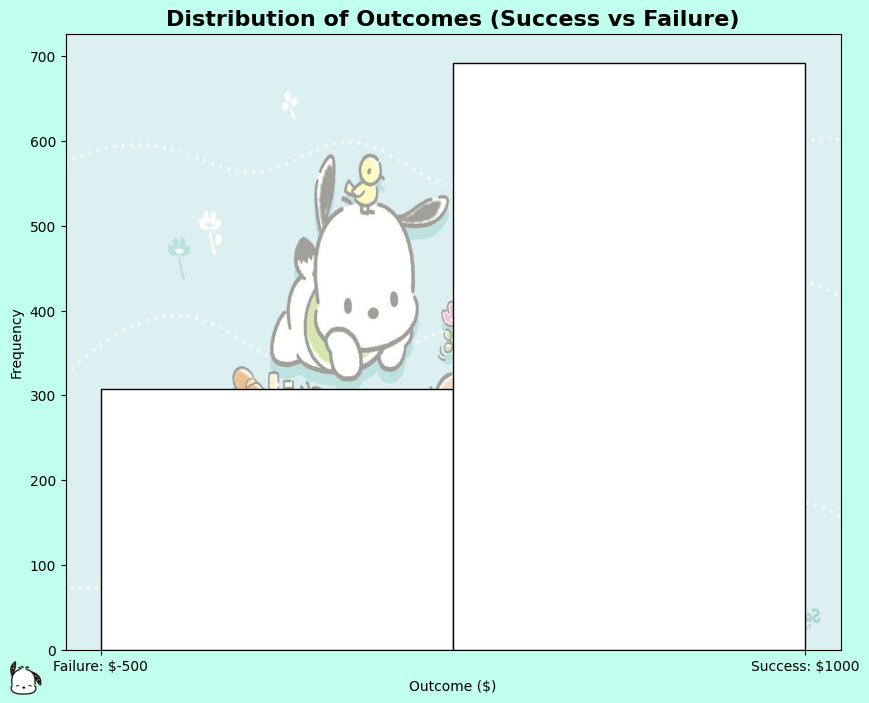

The default probability leads to a balanced outcome.


In [97]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

def simulate_investment(num_simulations, p_success, reward_success, penalty_failure):
    total_return = 0
    outcomes = []

    for _ in range(num_simulations):
        if np.random.rand() < p_success:
            total_return += reward_success
            outcomes.append(reward_success)
        else:
            total_return += penalty_failure
            outcomes.append(penalty_failure)

    average_return = total_return / num_simulations
    return average_return, outcomes

num_simulations = 1000
p_success = 0.7
reward_success = 1000
penalty_failure = -500

average_return, outcomes = simulate_investment(num_simulations, p_success, reward_success, penalty_failure)

print(f"Average return after {num_simulations} iterations: ${average_return:.2f}")

main_image_url = "https://i.postimg.cc/KYjBwXfP/pochacco.jpg"
response = requests.get(main_image_url)
main_image = Image.open(BytesIO(response.content))
main_image = main_image.transpose(Image.FLIP_LEFT_RIGHT)

sticker_image_url = "https://i.postimg.cc/L6FkXb4S/pochacco-face.png"
response = requests.get(sticker_image_url)
sticker_image = Image.open(BytesIO(response.content))
sticker = sticker_image.resize((50, 50))

plt.figure(figsize=(10, 8), facecolor='#c0ffee')
plt.hist(outcomes, bins=2, edgecolor='black', color=['white'])
plt.title('Distribution of Outcomes (Success vs Failure)', fontsize=16, weight='bold')
plt.xlabel('Outcome ($)')
plt.ylabel('Frequency')
plt.xticks([penalty_failure, reward_success], [f"Failure: ${penalty_failure}", f"Success: ${reward_success}"])

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
plt.gca().imshow(main_image, extent=(xlim[0], xlim[1], ylim[0], ylim[1]), aspect='auto', alpha=0.8, zorder=-1)

plt.gcf().figimage(sticker, xo=0, yo=0, zorder=10)

plt.show()

if p_success > 0.7:
    print("Increasing the probability of success leads to higher average returns.")
elif p_success < 0.7:
    print("Decreasing the probability of success reduces the average return.")
else:
    print("The default probability leads to a balanced outcome.")

# Exercise 4: Probability Distribution in AI

In [98]:
p_purchase_given_cart = 0.4
p_cart = 0.3

p_purchase = conditional_probability(p_purchase_given_cart, p_cart)
print(f"Probability of purchase: {p_purchase}")

Probability of purchase: 1.3333333333333335


# Assessment Task 4: Real-World Scenario

Given a humidity of 80.0% and cloud cover of 70.0%, the probability of rain is 0.21


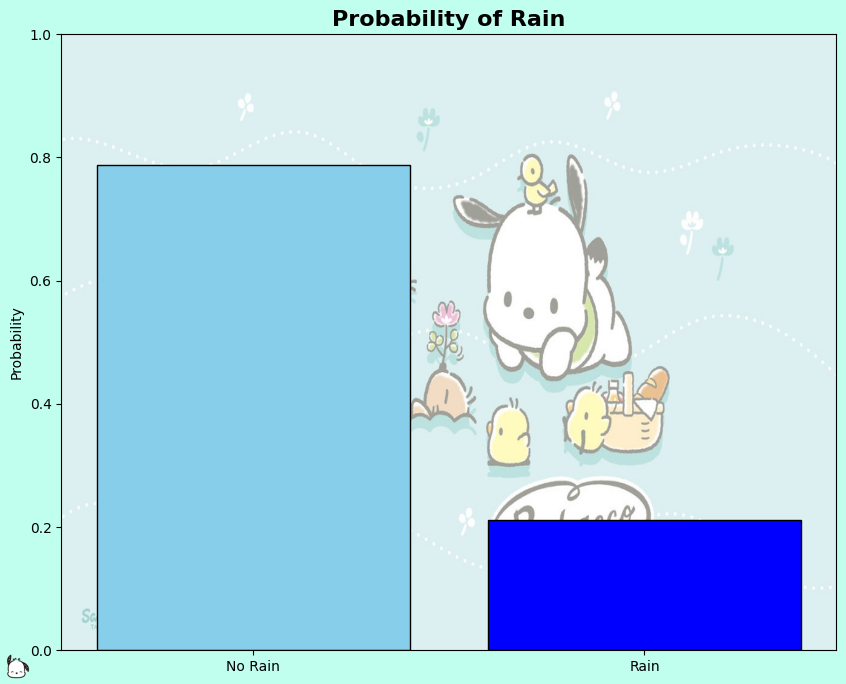

High humidity alone can significantly increase the chance of rain.


In [99]:
import numpy as np
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

def conditional_probability_rain(humidity, cloud_cover, p_rain=0.2):
    likelihood_rain_given_evidence = (0.8 * humidity + 0.6 * cloud_cover) * p_rain
    total_probability = min(1, max(0, likelihood_rain_given_evidence))
    return total_probability

humidity = 0.8
cloud_cover = 0.7
p_rain = 0.2

probability_of_rain = conditional_probability_rain(humidity, cloud_cover, p_rain)

print(f"Given a humidity of {humidity*100}% and cloud cover of {cloud_cover*100}%, the probability of rain is {probability_of_rain:.2f}")

main_image_url = "https://i.postimg.cc/KYjBwXfP/pochacco.jpg"
response = requests.get(main_image_url)
main_image = Image.open(BytesIO(response.content))

sticker_image_url = "https://i.postimg.cc/L6FkXb4S/pochacco-face.png"
response = requests.get(sticker_image_url)
sticker_image = Image.open(BytesIO(response.content))
sticker = sticker_image.resize((35, 35))

plt.figure(figsize=(10, 8), facecolor='#c0ffee')
labels = ['No Rain', 'Rain']
probabilities = [1 - probability_of_rain, probability_of_rain]
plt.bar(labels, probabilities, color=['skyblue', 'blue'], edgecolor='black')
plt.title('Probability of Rain', fontsize=16, weight='bold')
plt.ylabel('Probability')
plt.ylim(0, 1)

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
plt.gca().imshow(main_image, extent=(xlim[0], xlim[1], ylim[0], ylim[1]), aspect='auto', alpha=0.8, zorder=-1)

plt.gcf().figimage(sticker, xo=0, yo=0, zorder=10)

plt.show()

if humidity > 0.75 and cloud_cover > 0.75:
    print("Both high humidity and significant cloud cover increase the chance of rain.")
elif humidity > 0.75:
    print("High humidity alone can significantly increase the chance of rain.")
elif cloud_cover > 0.75:
    print("A high cloud cover alone can slightly increase the chance of rain.")
else:
    print("Lower values for humidity and cloud cover decrease the likelihood of rain.")

# Exercise 5: Probability Distributions Visualization

<function matplotlib.pyplot.show(close=None, block=None)>

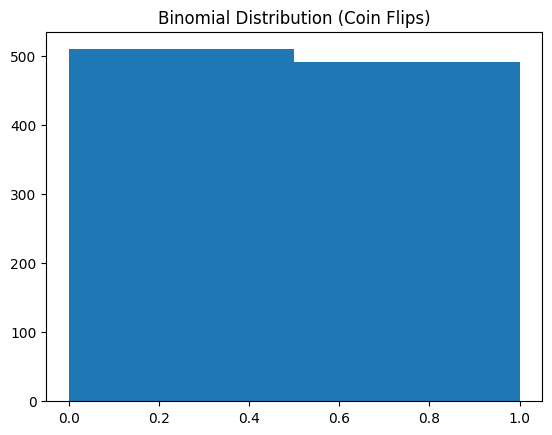

In [100]:
import numpy as np
import matplotlib.pyplot as plt

n_trials = 1000
p_head = 0.5
binomial_distribution = np.random.binomial(n=1, p = p_head, size = n_trials)

plt.hist(binomial_distribution, bins=2)
plt.title("Binomial Distribution (Coin Flips)")
plt.show

# Assessment Task 5: Real-World Application of Probability in AI

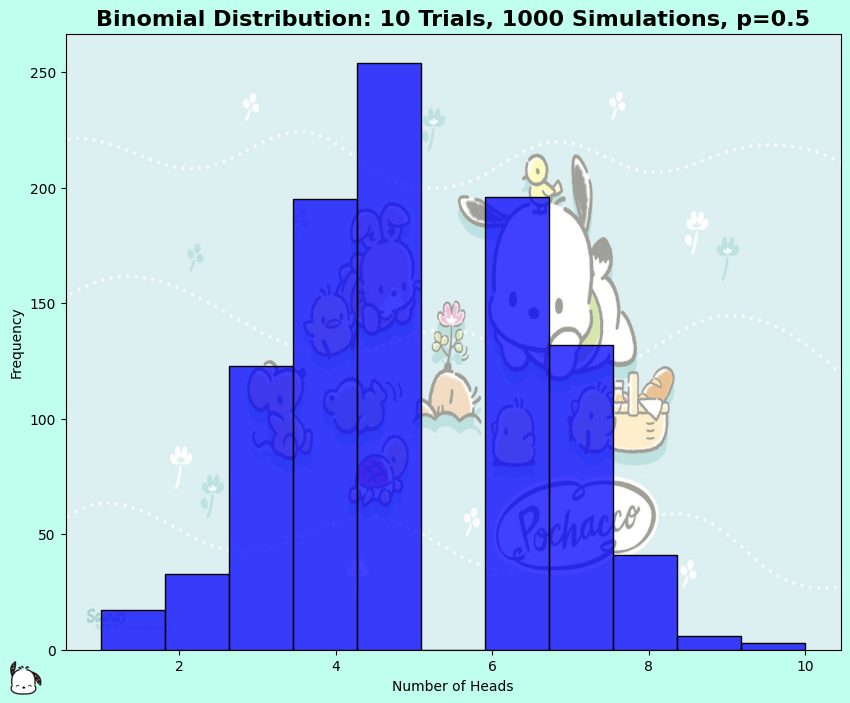

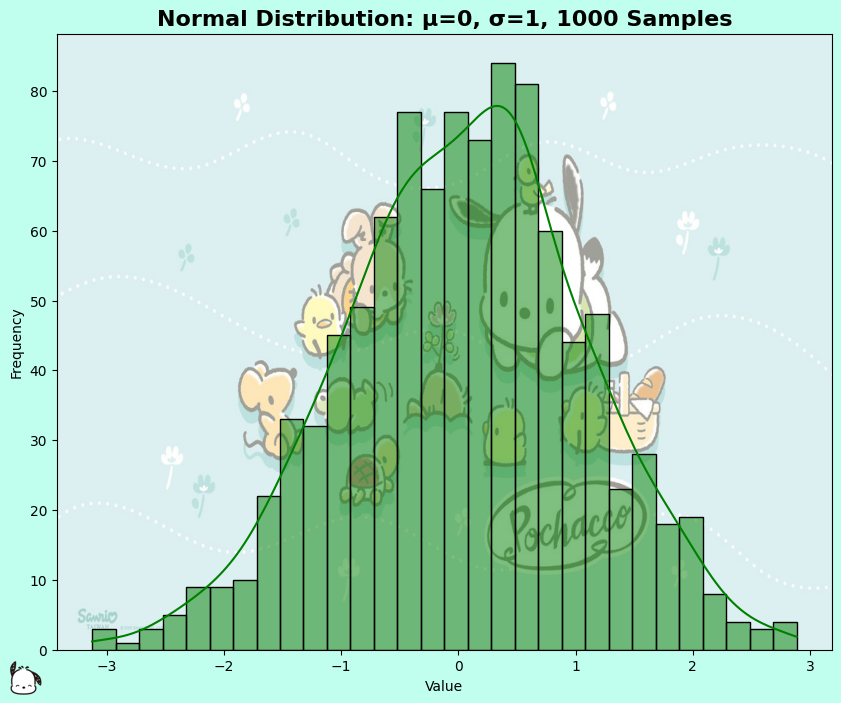

The distribution is symmetric because the probability of heads is 0.5.
Changing the number of trials from 10 affects the spread. More trials increase the spread of the distribution.
Adjusting the mean (μ) shifts the center of the normal distribution, while changing the standard deviation (σ) affects the spread of the data.


In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from PIL import Image
from io import BytesIO

def simulate_binomial(n_trials, p_head, n_simulations):
    outcomes = np.random.binomial(n=n_trials, p=p_head, size=n_simulations)
    return outcomes

def simulate_normal(mu, sigma, size):
    outcomes = np.random.normal(mu, sigma, size)
    return outcomes

n_trials = 10
p_head = 0.5
n_simulations = 1000

binomial_outcomes = simulate_binomial(n_trials, p_head, n_simulations)

main_image_url = "https://i.postimg.cc/KYjBwXfP/pochacco.jpg"
response = requests.get(main_image_url)
main_image = Image.open(BytesIO(response.content))

sticker_image_url = "https://i.postimg.cc/L6FkXb4S/pochacco-face.png"
response = requests.get(sticker_image_url)
sticker_image = Image.open(BytesIO(response.content))
sticker = sticker_image.resize((50, 50))

plt.figure(figsize=(10, 8), facecolor='#c0ffee')
sns.histplot(binomial_outcomes, bins=n_trials+1, kde=False, color='blue', edgecolor='black')
plt.title(f'Binomial Distribution: {n_trials} Trials, {n_simulations} Simulations, p={p_head}', fontsize=16, weight='bold')
plt.xlabel('Number of Heads')
plt.ylabel('Frequency')

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
plt.gca().imshow(main_image, extent=(xlim[0], xlim[1], ylim[0], ylim[1]), aspect='auto', alpha=0.8, zorder=-1)

plt.gcf().figimage(sticker, xo=0, yo=0, zorder=10)

plt.show()

mu = 0
sigma = 1
size = 1000

normal_outcomes = simulate_normal(mu, sigma, size)

plt.figure(figsize=(10, 8), facecolor='#c0ffee')
sns.histplot(normal_outcomes, bins=30, kde=True, color='green', edgecolor='black')
plt.title(f'Normal Distribution: μ={mu}, σ={sigma}, {size} Samples', fontsize=16, weight='bold')
plt.xlabel('Value')
plt.ylabel('Frequency')

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()
plt.gca().imshow(main_image, extent=(xlim[0], xlim[1], ylim[0], ylim[1]), aspect='auto', alpha=0.8, zorder=-1)

plt.gcf().figimage(sticker, xo=0, yo=0, zorder=10)

plt.show()

if p_head == 0.5:
    print("The distribution is symmetric because the probability of heads is 0.5.")
elif p_head < 0.5:
    print("The distribution skews to the left, indicating more tails than heads.")
else:
    print("The distribution skews to the right, indicating more heads than tails.")

print(f"Changing the number of trials from {n_trials} affects the spread. More trials increase the spread of the distribution.")

print(f"Adjusting the mean (μ) shifts the center of the normal distribution, while changing the standard deviation (σ) affects the spread of the data.")